In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
df = pd.read_csv("Feature_engin_treated.csv")

### Rapport profiling des features enginered

In [2]:

# Charger le dataset
df = pd.read_csv('Feature_engin_treated.csv')

# Générer le rapport de profiling
report = ProfileReport(df)

# Sauvegarder le rapport au format HTML
report.to_file('rapport_engin.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df.head()

,Customer ID,AverageAmount,TotalAmount,TimeDiff,R,F,M,RFM
0,12346.0,-1.100851,-51.74,8.543478,1.0,2.0,3.0,123.0
1,12608.0,25.986875,415.79,0.000000,1.0,4.0,4.0,144.0
2,12745.0,32.902273,723.85,4.142857,1.0,4.0,4.0,144.0
3,12746.0,11.542500,230.85,10.631579,1.0,4.0,4.0,144.0
4,12747.0,34.188833,8786.53,2.816406,4.0,1.0,2.0,412.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    5410 non-null   float64
 1   AverageAmount  5410 non-null   float64
 2   TotalAmount    5410 non-null   float64
 3   TimeDiff       5272 non-null   float64
 4   R              5410 non-null   float64
 5   F              5410 non-null   float64
 6   M              5410 non-null   float64
 7   RFM            5410 non-null   float64
dtypes: float64(8)
memory usage: 338.2 KB


### Methode du coude

In [5]:
df_cleansed = df.dropna()
df_cleansed.isna().sum()

Customer ID      0
AverageAmount    0
TotalAmount      0
TimeDiff         0
R                0
F                0
M                0
RFM              0
dtype: int64

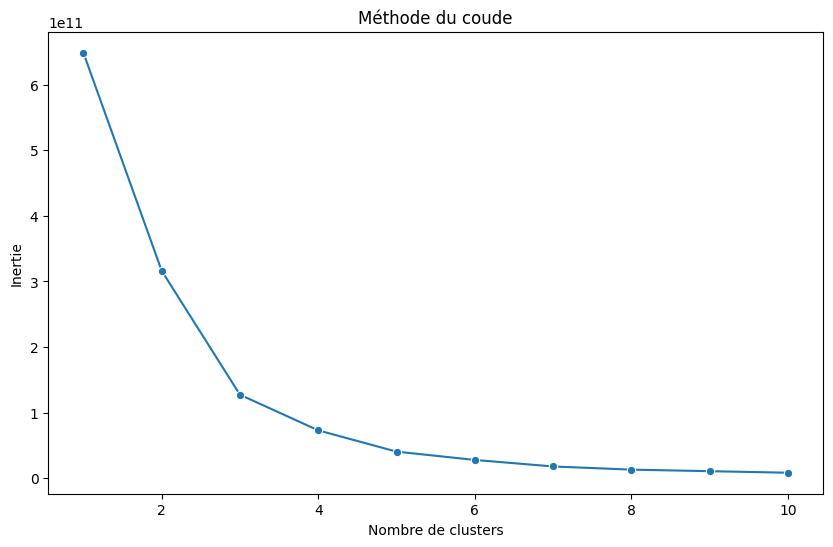

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

columns = ['AverageAmount', 'TotalAmount', 'TimeDiff', 'R', 'F', 'M', 'RFM']
data = df_cleansed[columns]

inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()


### Clustering

In [7]:
df_cleansed = df.dropna()
df_cleansed.isna().sum()

Customer ID      0
AverageAmount    0
TotalAmount      0
TimeDiff         0
R                0
F                0
M                0
RFM              0
dtype: int64

In [8]:
df_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5272 entries, 0 to 5409
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    5272 non-null   float64
 1   AverageAmount  5272 non-null   float64
 2   TotalAmount    5272 non-null   float64
 3   TimeDiff       5272 non-null   float64
 4   R              5272 non-null   float64
 5   F              5272 non-null   float64
 6   M              5272 non-null   float64
 7   RFM            5272 non-null   float64
dtypes: float64(8)
memory usage: 370.7 KB


In [9]:
df_cleansed.shape

(5272, 8)

In [10]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Charger le dataset


# Sélectionner les colonnes à utiliser pour le clustering
columns = ['AverageAmount', 'TotalAmount', 'TimeDiff', 'R', 'F', 'M', 'RFM']
data = df_cleansed[columns]

# Créer le pipeline de standardisation et clustering
pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=4, max_iter=100,random_state=42))

# Effectuer le clustering
pipeline.fit(data)

# Obtenir les labels de cluster pour chaque échantillon
labels = pipeline.predict(data)

# Ajouter les labels de cluster au DataFrame
df_cleansed['Cluster'] = labels

# Afficher le DataFrame avec les labels de cluster
# print(df_cleansed.head())





/tmp/ipykernel_22322/2458600017.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleansed['Cluster'] = labels


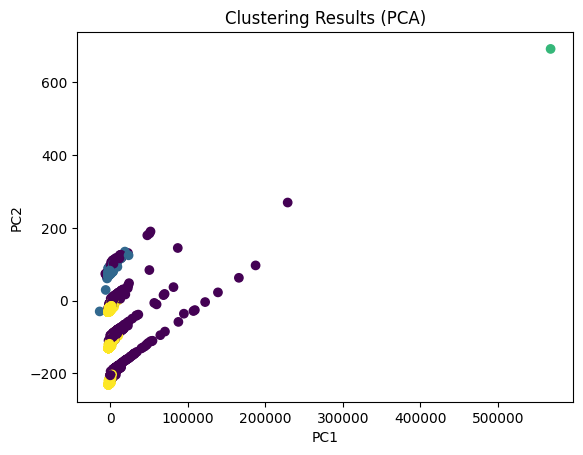

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering Results (PCA)')
plt.show()


In [12]:
df_try = df_cleansed

In [13]:
# Supprimer les lignes avec les valeurs spécifiques dans la colonne "TimeDiff"
df_try = df_try.drop(df_try[(df_try['Customer ID'] == 12918) | (df_try['Customer ID'] == 17013)].index)

# Réinitialiser les indices du DataFrame
df_try = df_try.reset_index(drop=True)


In [14]:
df_try.min()

Customer ID      12346.0
AverageAmount     -360.4
TotalAmount      -3767.2
TimeDiff             0.0
R                    1.0
F                    1.0
M                    1.0
RFM                111.0
Cluster              0.0
dtype: float64

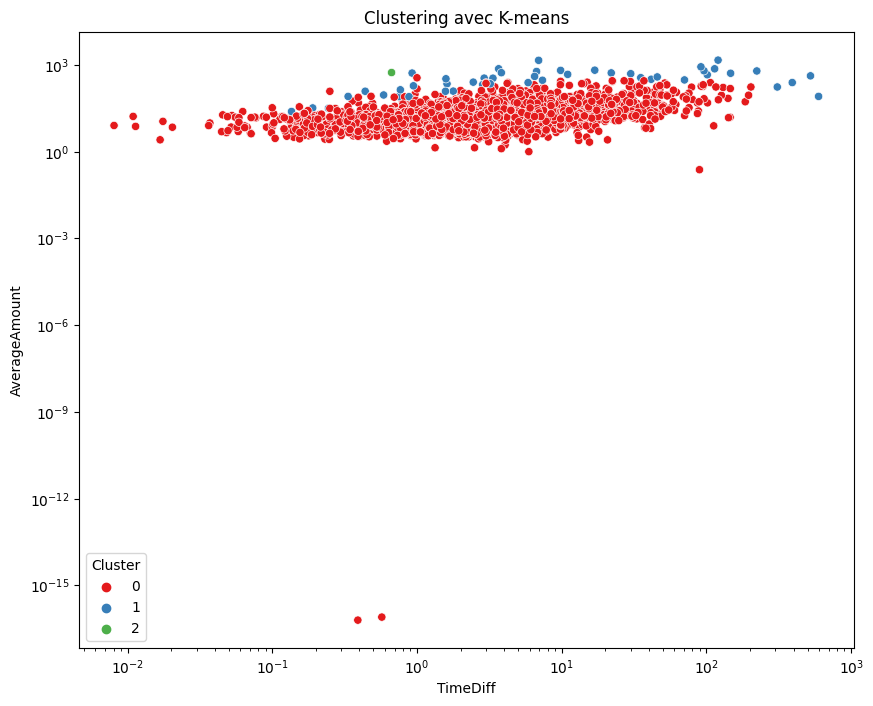

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler

# Charger le dataset
df = df_try

# Sélectionner les colonnes à utiliser pour le clustering (R, F, M)
X = df[['AverageAmount', 'TotalAmount', 'TimeDiff']]

# Créer une pipeline avec une étape de mise à l'échelle robuste
pipeline = Pipeline([
    ('scaler', RobustScaler())
])

# Appliquer la transformation de mise à l'échelle robuste sur les colonnes numériques
X_scaled = pipeline.fit_transform(X)

# Définir le nombre de clusters
num_clusters = 3

# Créer une instance du modèle K-means avec une initialisation K-means++
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)

# Effectuer le clustering
kmeans.fit(X_scaled)

# Obtenir les labels de clusters assignés à chaque échantillon
labels = kmeans.labels_

# Ajouter les labels de clusters au DataFrame
df['Cluster'] = labels

# Visualiser les clusters en utilisant un diagramme en nuage de points
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='TimeDiff', y='AverageAmount', hue='Cluster', palette='Set1')
plt.xlabel('TimeDiff')
plt.ylabel('AverageAmount')
plt.title('Clustering avec K-means')
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Cluster')
plt.show()



In [35]:


# Effectuer un groupby sur la colonne "Cluster"
df_grouped = df.groupby('Cluster').describe()

# Afficher le DataFrame résultant
df_grouped.head()


PC1                                                                \
          count      mean       std        min        25%       50%       75%   
Cluster                                                                         
0        5233.0  0.062106  0.749804  -7.102724   0.003964  0.182845  0.308321   
1          11.0 -9.276416  7.012380 -28.802623  -8.708211 -7.300806 -5.767265   
2          28.0 -7.962939  4.528359 -18.172847 -10.398195 -6.264993 -4.144588   

                       PC2                                            \
               max   count       mean       std        min       25%   
Cluster                                                                
0        34.116509  5233.0   0.010346  0.486441  -4.336888 -0.067954   
1        -4.509406    11.0  11.394331  9.081815   5.439852  6.746777   
2        -3.518192    28.0  -6.409903  5.401974 -23.195183 -7.275983   

                                         
              50%        75%        max  
Cluster                                  
0        0.052635   0.090594   5.936614  
1        8.170481  11.723703  37.244090  
2       -4.944580  -3.671138   1.263474

In [34]:
df_cleansed.head()

,Customer ID,AverageAmount,TotalAmount,TimeDiff,R,F,M,RFM,Cluster
count,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000
mean,15561.865137,23.556028,2563.796923,5.436604,1.781866,3.523331,3.597686,217.017640,1.568285
std,1580.590077,79.810054,11093.169038,17.699283,0.981246,0.799014,0.751106,94.486439,1.093904
min,12346.000000,-3651.166667,-10953.500000,0.000000,1.000000,1.000000,1.000000,111.000000,0.000000
25%,14198.750000,9.776557,329.355000,0.115435,1.000000,3.000000,3.000000,144.000000,1.000000
50%,15572.500000,16.112564,824.810000,2.028954,1.000000,4.000000,4.000000,144.000000,1.000000
75%,16926.250000,21.626653,2114.492500,5.046467,2.000000,4.000000,4.000000,244.000000,3.000000
max,18287.000000,1459.440000,570380.610000,596.000000,4.000000,4.000000,4.000000,444.000000,3.000000


In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



df_pca = df_cleansed
# Sélectionner les colonnes pertinentes pour l'ACP
features = ['AverageAmount','TotalAmount', 'TimeDiff']

# Standardisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca[features])

# Création de la matrice de corrélation
corr_matrix = pd.DataFrame(df_scaled, columns=features).corr()

# Calcul des composantes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Créer un DataFrame pour stocker les résultats de l'ACP
df_test = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Afficher les premières lignes du DataFrame résultant
df_test

,PC1,PC2
0,0.247692,-0.293254
1,0.223286,0.072196
2,0.030147,-0.068944
3,0.061713,-0.355541
4,-0.287882,0.508649
...,...,...
5267,0.318216,0.190657
5268,0.319669,0.070117
5269,0.135621,0.073501
5270,0.171353,-0.017064


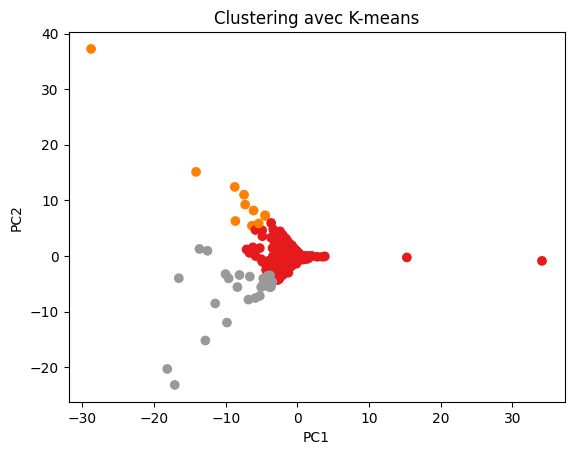

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Charger le dataset
df = df_test

# Sélectionner les colonnes à utiliser pour le clustering (R, F, M)
X = df[['PC1', 'PC2']]

# Appliquer la transformation de mise à l'échelle avec StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Définir le nombre de clusters
num_clusters = 3

# Créer une instance du modèle K-means avec une initialisation K-means++
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)

# Effectuer le clustering
kmeans.fit(X_scaled)

# Obtenir les labels de clusters assignés à chaque échantillon
labels = kmeans.labels_

# Ajouter les labels de clusters au DataFrame
df['Cluster'] = labels

# Visualiser les clusters en utilisant un diagramme en nuage de points
plt.scatter(df['PC1'], df['PC2'], c=df['Cluster'], cmap='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering avec K-means')

# Ajouter des annotations aux points
# for i, row in df.iterrows():
#     plt.annotate(row['Cluster'], (row['PC1'], row['PC2']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


In [20]:
# Effectuer un groupby sur la colonne "Cluster"
df_grouped = df_cleansed.groupby('Cluster').describe()

# Afficher le DataFrame résultant
df_grouped.head()

Customer ID                                                         \
              count          mean          std      min       25%      50%   
Cluster                                                                      
0             673.0  15546.597325  1574.597662  12747.0  14180.00  15555.0   
1            2764.0  15564.426194  1588.103819  12346.0  14195.75  15577.5   
2               1.0  18102.000000          NaN  18102.0  18102.00  18102.0   
3            1834.0  15562.223010  1571.553775  12820.0  14216.50  15570.5   

                           AverageAmount              ...    M          RFM  \
              75%      max         count        mean  ...  75%  max   count   
Cluster                                               ...                     
0        16912.00  18283.0         673.0   28.162847  ...  3.0  4.0   673.0   
1        16946.25  18286.0        2764.0   21.843377  ...  4.0  4.0  2764.0   
2        18102.00  18102.0           1.0  543.219629  ...  1.0  1.0     1.0   
3        16908.50  18287.0        1834.0   24.163287  ...  4.0  4.0  1834.0   

                                                                   
               mean        std    min    25%    50%    75%    max  
Cluster                                                            
0        311.096582  91.043543  111.0  223.0  322.0  411.0  432.0  
1        142.256874   4.316287  123.0  144.0  144.0  144.0  144.0  
2        411.000000        NaN  411.0  411.0  411.0  411.0  411.0  
3        295.059978  69.380044  224.0  244.0  244.0  344.0  444.0  

[4 rows x 64 columns]

In [21]:
df_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5272 entries, 0 to 5409
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    5272 non-null   float64
 1   AverageAmount  5272 non-null   float64
 2   TotalAmount    5272 non-null   float64
 3   TimeDiff       5272 non-null   float64
 4   R              5272 non-null   float64
 5   F              5272 non-null   float64
 6   M              5272 non-null   float64
 7   RFM            5272 non-null   float64
 8   Cluster        5272 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 520.3 KB
